In [1]:
%matplotlib inline 
%load_ext autoreload
%autoreload 2
# %config InlineBackend.figure_format = 'retina'

In [2]:
import nawrapper as nw
import pymaster as nmt
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
from astropy.io import fits
from pixell import enmap, enplot

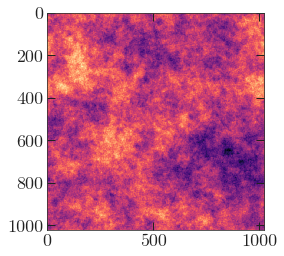

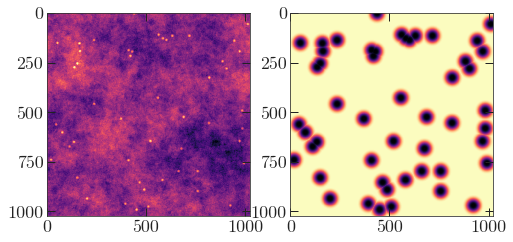

In [3]:
# map information
shape,wcs = enmap.geometry(shape=(1024,1024),
    res=np.deg2rad(0.5/60.),pos=(0,0))

# create power spectrum information
ells = np.arange(0,6000,1)
ps = np.zeros(len(ells))
ps[2:] = 1/ells[2:]**2.5 # don't want monopole/dipole

# generate a realization
imap = enmap.rand_map(shape,wcs,ps[np.newaxis, np.newaxis])
plt.imshow(imap)

mask = enmap.ones(imap.shape, imap.wcs)

N_point_sources = 50
for i in range(N_point_sources):
    mask[
        np.random.randint(low=0, high=mask.shape[0]),
        np.random.randint(low=0, high=mask.shape[1]) ] = 0
# apodize the pixels to make fake sources
point_source_map = 1-nw.apod_C2(mask, 0.1)

imap += point_source_map # add our sources to the map
mask = nw.apod_C2(mask, 0.5) # apodize the mask

# plot our cool results
fig, axes = plt.subplots(1, 2, figsize=(8,16))
axes[0].imshow(imap)
axes[1].imshow(mask)


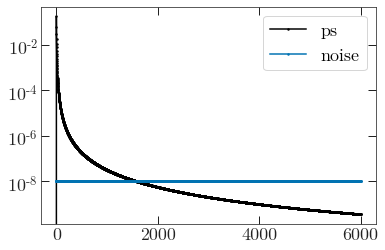

In [4]:
ells = np.arange(0,len(ps),1)
nl = np.ones(len(ells)) * 1e-8

noise_map_1 = enmap.rand_map(shape,wcs,nl[np.newaxis, np.newaxis])
noise_map_2 = enmap.rand_map(shape,wcs,nl[np.newaxis, np.newaxis])

plt.plot(ps, label="ps")
plt.plot(nl, label="noise")
plt.yscale('log')
plt.legend()

In [5]:
namap_1 = nw.namap(map_I=imap + noise_map_1, mask=mask)
namap_2 = nw.namap(map_I=imap + noise_map_2, mask=mask)

In [6]:
binfile = 'data/BIN_ACTPOL_50_4_SC_low_ell'
bins = nw.read_bins(binfile)

In [7]:
%%time
mc = nw.mode_coupling(namap_1, namap_2, bins)

CPU times: user 40min 50s, sys: 3.32 s, total: 40min 53s
Wall time: 1min 6s


In [8]:
a = nmt.NmtWorkspace()

In [9]:
data = {
    'pol': False,
    "binfile": '/home/zequnl/src/nawrapper/notebooks/data/BIN_ACTPOL_50_4_SC_low_ell',
    'w00': 'w00.bin'
}

In [10]:
import json

In [21]:
with open("mcm.json", "w") as write_file:
    json.dump(data, write_file)

In [25]:
! cat mcm.json

{"pol": false, "binfile": "/home/zequnl/src/nawrapper/notebooks/data/BIN_ACTPOL_50_4_SC_low_ell", "w00": "w00.bin"}

In [26]:
with open("mcm.json", "r") as read_file:
    print(json.load(read_file))

{'pol': False, 'binfile': '/home/zequnl/src/nawrapper/notebooks/data/BIN_ACTPOL_50_4_SC_low_ell', 'w00': 'w00.bin'}


In [27]:
mc.w00.write_to('w00.bin')
# mc.w02.write_to('w02.bin')
# mc.w22.write_to('w22.bin')

In [28]:
a = nmt.NmtWorkspace()
a.read_from('w00.bin')

In [32]:
nw.mode_coupling(mcm_from_dir='.')

In [43]:
import pathlib
pathlib.Path("testdir").mkdir(parents=True, exist_ok=True)

In [39]:
! rm -rf testdir

data		       planck2018		 testdir
DayNight.ipynb	       Reproduce Planck.ipynb	 w00.bin
Getting Started.ipynb  Reproduce Steve.ipynb
mcm.json	       Saving and Loading.ipynb
